# ------------------ '(Churn Prediction)' ---------------------
### data link : "https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?authuser=0"
# Project steps 
### 1) Understanding Data 
* a- Understand Columns
* b- check dtype 
* c- Describe Numerical Cols
* d- Describe Categorical Cols
* e- Catching any error
### 2) Data Cleaning "Handling any error" 
### 3) EXTRACT FEATURES + EDA ("Univariate Analysis" , "Bivariate Analysis") 
### 4) Pre-Processing Mind Map:
* a- Detect & Handle Duplicates
* b- train_test_split
* c- Detect & Handle NaNs
* d- Detect & Handle Outliers
* e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f- Imbalanced: X_train_resampled
* g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

#### 5) Modeling

* 1) Simple Model & Evaluate it's Performance
* 2) Bias vs Variance (Underfitting vs Overfitting)
* 3) GridSearch
* 4) Test Perforamnce
* 5) Save Model

In [63]:
# 📦 Data analysis and visualization libraries
import pandas as pd                            # For data loading and manipulation
import numpy as np                             # For numerical computations
import matplotlib.pyplot as plt                # For basic plotting
import seaborn as sns                          # For statistical plots
import plotly.express as px                    # For quick interactive plots
from plotly.subplots import make_subplots      # For subplotting in Plotly

# 🧹 Data preprocessing and cleaning
from sklearn.impute import SimpleImputer              # For missing value imputation (simple methods)
from sklearn.impute import KNNImputer                 # For missing value imputation (KNN-based)
from sklearn.preprocessing import RobustScaler,MinMaxScaler , StandardScaler     # For scaling features robust to outliers
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder    # For encoding categorical features
from sklearn.compose import ColumnTransformer         # For applying transformers to specific columns

# ⚖️ Handling imbalanced data
from imblearn.over_sampling import SMOTE              # For oversampling minority class
from imblearn.under_sampling import RandomUnderSampler  # For undersampling majority class
from imblearn.pipeline import Pipeline                # Pipeline supporting sampling steps

# 🧪 Data splitting and cross-validation
from sklearn.model_selection import train_test_split      # For splitting data into train and test sets
from sklearn.model_selection import StratifiedKFold       # For stratified K-Fold cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict  # For cross-validation

# 🧮 Classification models
from sklearn.linear_model import LogisticRegression       # Logistic Regression model
from sklearn.svm import SVC                               # Support Vector Machine model
from sklearn.neighbors import KNeighborsClassifier        # K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier           # Decision Tree model
from sklearn.ensemble import RandomForestClassifier       # Random Forest model
from sklearn.ensemble import GradientBoostingClassifier   # Gradient Boosting model
from sklearn.ensemble import HistGradientBoostingClassifier  # Fast version of Gradient Boosting
from xgboost import XGBClassifier                         # XGBoost model
from catboost import CatBoostClassifier                   # CatBoost model

# 🔍 Model evaluation and tuning
from sklearn.model_selection import GridSearchCV          # For hyperparameter tuning
from sklearn.metrics import accuracy_score                # For calculating accuracy
from sklearn.metrics import classification_report         # For detailed classification performance
from sklearn.metrics import confusion_matrix              # For generating confusion matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# 💾 Saving and loading models
import joblib   

In [64]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1) Understanding Data
* a- Understand Columns
* b- check dtype
* c- Describe Numerical Cols
* d- Describe Categorical Cols
* e- Catching any error

In [65]:
#  Understand Columns

# ( RowNumber , CustomerId )  is index column "should remove"
# Surname "should remove"

# CreditScore (To what degree does the person return the money)
# Tenure (Number of years in the bank)
# Balance (The number of funds in the person's account)
# NumOfProducts (The number of bank services the person is subscribed to)
# Exited (if 1 the person will churn if 0 means the opesit)


In [66]:
# check dtype

df.info() # it is corect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [67]:
# Describe Numerical Cols

df.select_dtypes(include='number').describe()

# the min of EstimatedSalary is 11 ? 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [68]:
df[df['EstimatedSalary'] < 100]

# any 'EstimatedSalary' < 100 and 'Balance' > 100000 shoud drop

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
5548,5549,15639662,Phillips,710,France,Male,38,2,0.00,2,1,0,96.27,0
9010,9011,15786463,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
9647,9648,15679693,Walker,625,France,Male,31,5,0.00,2,0,1,90.07,0


In [69]:
# Describe Categorical Cols

for col in df.select_dtypes(include="O").columns :
    
    print(f"{col} : number of uniques is: {df[col].nunique()}")
    print(f"uniques of : '{col}' is: \n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

Surname : number of uniques is: 2932
uniques of : 'Surname' is: 
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

**************************************************

Geography : number of uniques is: 3
uniques of : 'Geography' is: 
['France' 'Spain' 'Germany']

**************************************************

Gender : number of uniques is: 2
uniques of : 'Gender' is: 
['Female' 'Male']

**************************************************



# 2) Data Cleaning "Handling any error"

In [70]:
df.drop(index= df[(df['EstimatedSalary'] < 100) & (df['Balance'] > 100000)].index ,
        inplace = True)

df.reset_index(inplace=True, drop=True)

In [71]:

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# EXTRACT FEATURES + EDA ("Univariate Analysis" , "Bivariate Analysis")

In [72]:
def activity_segment (row):
    is_active, n_products = row['IsActiveMember'], row['NumOfProducts']
    
    if is_active == 0:
        return 'very_low_activity'

    elif is_active == 1 and n_products == 1:
        return 'small_activity'

    elif is_active == 1 and n_products == 2:
        return 'avg_activity'

    elif is_active == 1 and n_products == 3:
        return 'above_avg_activity'

    elif is_active == 1 and n_products == 4:
        return 'high_activity'



df['products_activity'] = df.apply(activity_segment, axis=1)

#  EDA

# Univariate Analysis

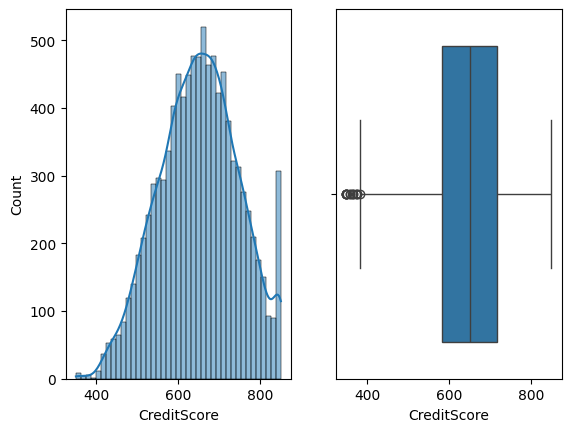

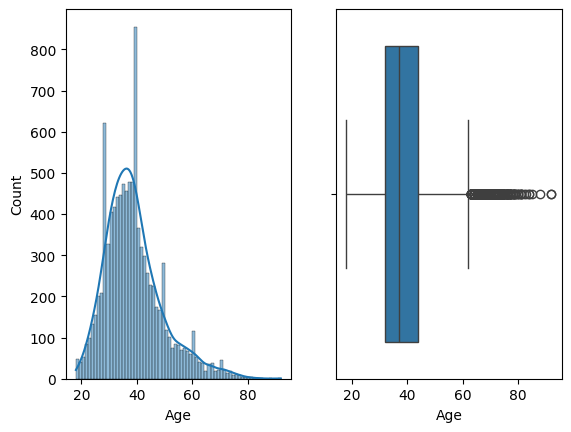

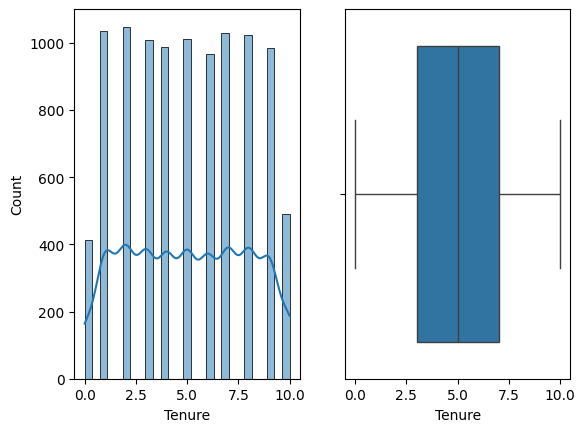

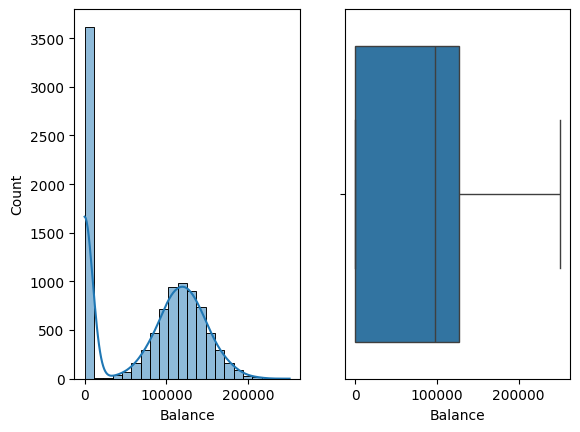

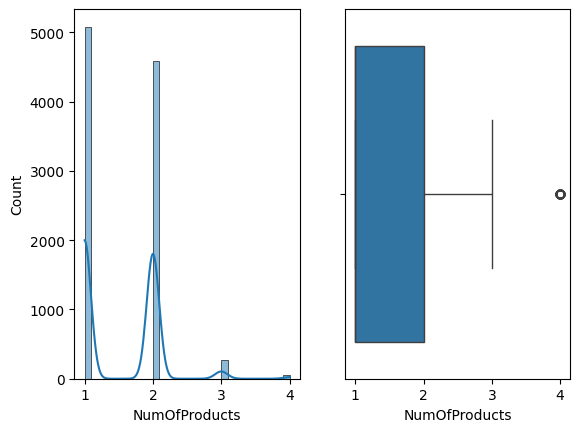

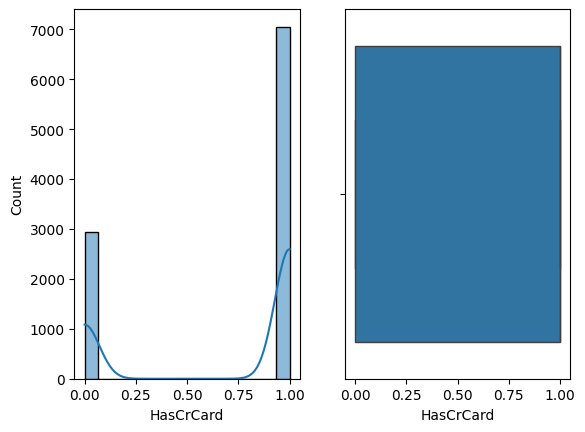

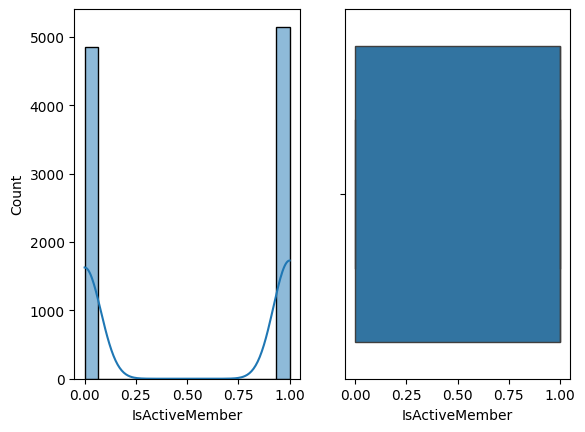

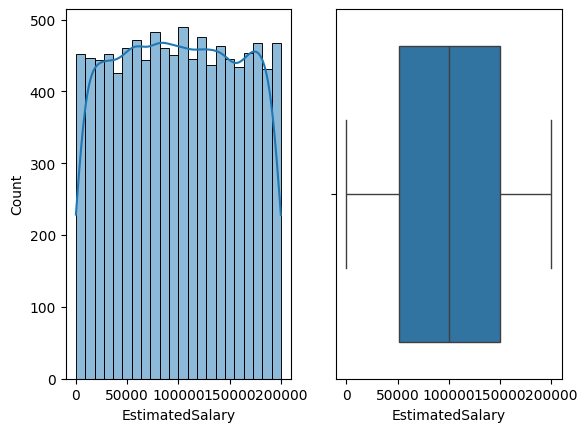

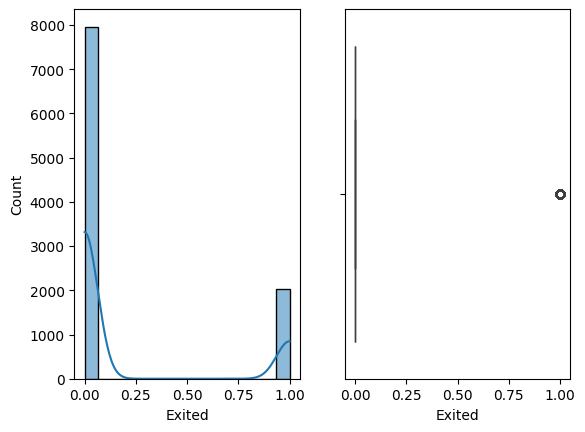

In [73]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()

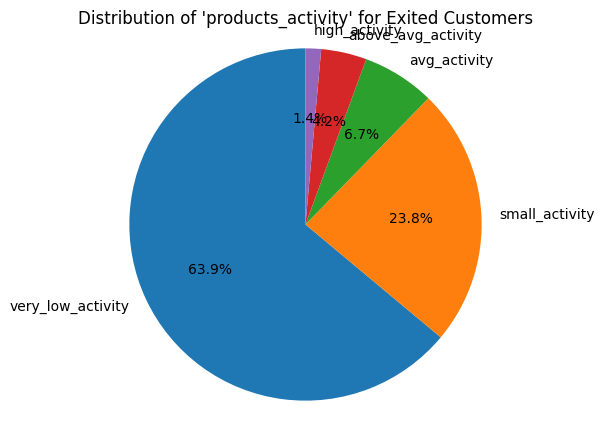

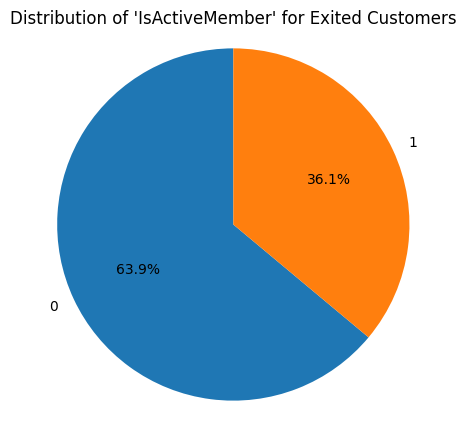

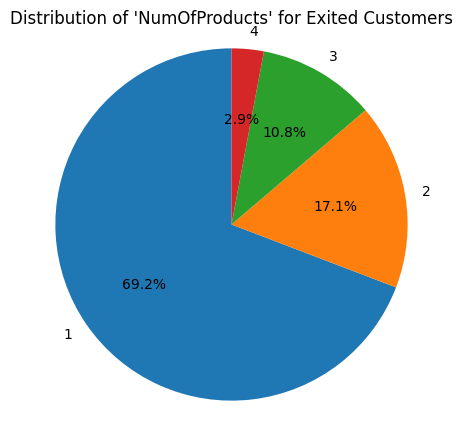

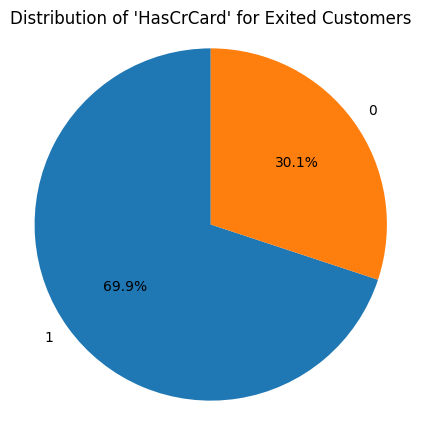

In [74]:
column_for_pie_char = ["products_activity", "IsActiveMember", "NumOfProducts", "HasCrCard"]

for column in column_for_pie_char:
    values = df[df["Exited"] == 1][column].value_counts()
    
    plt.figure(figsize=(5, 5))
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of '{column}' for Exited Customers")
    plt.axis('equal')  
    plt.show()

<Axes: >

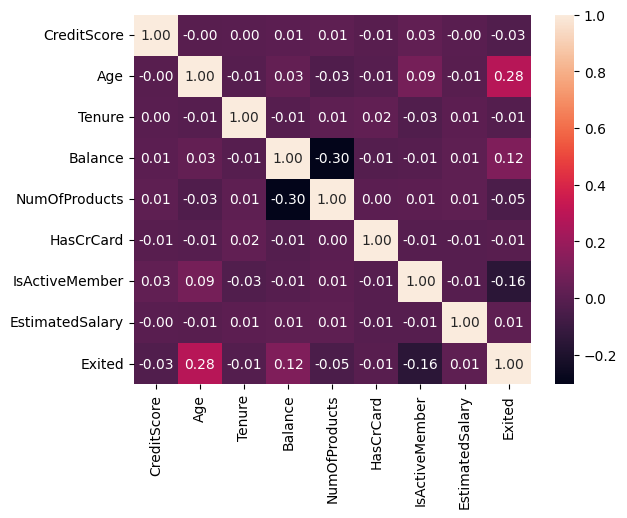

In [75]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f')

<Axes: xlabel='Geography', ylabel='count'>

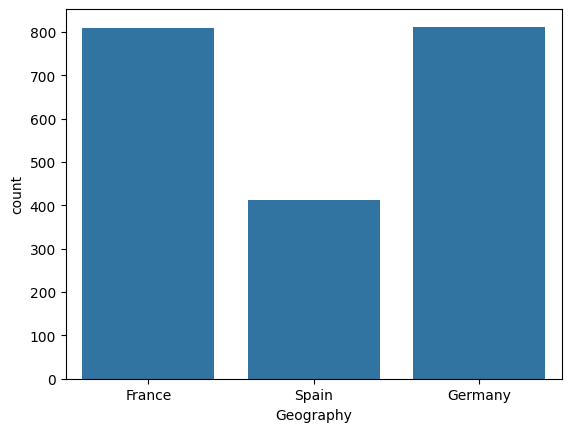

In [76]:
sns.countplot(x=df[df["Exited"] == 1]["Geography"] )

# 4) Pre-Processing Mind Map:
* a- Detect & Handle Duplicates
* b- train_test_split
* c- Detect & Handle NaNs
* d- Detect & Handle Outliers
* e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f- Imbalanced: X_train_resampled
* g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [77]:
# a- Detect & Handle Duplicates
df.duplicated().sum()

0

In [78]:
df.duplicated().sum()

0

In [79]:
df.drop(columns=["Exited"]).duplicated().sum()

0

In [80]:
df['Exited'].value_counts(normalize=True)

0    0.796459
1    0.203541
Name: Exited, dtype: float64

In [81]:
# b) train_test_split
from sklearn.model_selection import train_test_split  

X = df.drop(["Exited"], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7998, 11), (2000, 11), (7998,), (2000,))

In [82]:
# log transformer 

from sklearn.base import TransformerMixin, BaseEstimator

class LogTransformer(BaseEstimator, TransformerMixin):


    def fit(self, X , y=None):
        return self

    def transform(self, X):
        return np.log(X)




log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [83]:
# Encoding


Geography_gender_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', sparse_output=False))
])

products_activity_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['very_low_activity', 'small_activity', 'avg_activity', 'above_avg_activity', 'high_activity']]))
])


In [84]:
#  Scaling: StandardScaler, MinMaxScaler, RobustScaler

tenure_products_HasCrCard_IsActiveMember_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='most_frequent')) ,
    ('scale', RobustScaler()),
])

creditscore_and_EstimatedSalary_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
])

age_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', LogTransformer()),
    ('scale', RobustScaler()),
])

balance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('scale', RobustScaler()),
])

In [85]:
# making the preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('Geography_gender_pipe', Geography_gender_pipe, ['Geography', 'Gender']),
    ('products_activity_pipe', products_activity_pipe, ['products_activity']),
    ('tenure_degre_tenure_products_cc_active_pipe', tenure_products_HasCrCard_IsActiveMember_pipe, ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']),
    ('creditscore_and_EstimatedSalary_pipe', creditscore_and_EstimatedSalary_pipe, ['CreditScore', 'EstimatedSalary']),
    ('age_pipe', age_pipe, ['Age']),
    ('balance_pipe', balance_pipe, ['Balance']),
])

preprocessor

ColumnTransformer(transformers=[('Geography_gender_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Geography', 'Gender']),
                                ('products_activity_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OrdinalEncoder(categories=[[...
                                                  SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['CreditScore', 'EstimatedSalary']),
                                ('age_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  LogTransformer()),
                                                 ('scale', RobustScaler())]),
                                 ['Age']),
                                ('balance_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Balance'])])

# 4) Modeling
* 1) Simple Model & Validate it's perfromance
* 2) Underfitting vs Overfitting
* 3) Hyperparameters Tunning (best 5 Promissing models)
* 4) Ensemble (if needed)
* 5) Test Performance and it's CI
* 6) Save Model and load in streamlit application or flask application

In [86]:
# Simple Model & Validate it's perfromance with Imbalanced "over sampling"

from imblearn.pipeline import Pipeline 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

osampling_Simple_Model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42 )),
    ("model", LogisticRegression(C=1.0, max_iter=5000, random_state=42))
    ])

osampling_Simple_Model_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_Simple_Model_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=5)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model

    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_Simple_Model_pipeline.fit(X_train_fold , y_train_fold )
    y_valid_pred = osampling_Simple_Model_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall


Train Accuracy: 0.7106776694173543
Average Valid Accuracy: 0.7098039399624766
Average Valid F1 Score: 0.4950378449056901
Average Valid Precsion: 0.38323747459742363
Average Valid Recall: 0.6990504955167531


In [87]:
# Simple Model & Validate it's perfromance with Imbalanced "Random Under Sampling"

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

UnderSampling_Simple_Model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=5000, random_state=42))
    ])

UnderSampling_Simple_Model_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {UnderSampling_Simple_Model_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=5)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model

    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSampling_Simple_Model_pipeline.fit(X_train_fold , y_train_fold )
    y_valid_pred = UnderSampling_Simple_Model_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7049262315578895
Average Valid Accuracy: 0.7018007348342714
Average Valid F1 Score: 0.490373427612495
Average Valid Precsion: 0.3760090496563767
Average Valid Recall: 0.7052043416705993


# Underfitting Solutions:
* 1) More Complex Model
* 2) Extract More Features (PolynomialFeatures)
* 3) descrease constrains


In [89]:
# More Complex Model with "over sampling"
# KNN

osampling_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42 )),
    ("model", KNeighborsClassifier(n_neighbors=5, leaf_size=5))
    ])
params_grid = {'model__n_neighbors': [11 , 21,31,],
               'model__leaf_size':[11 , 21,31,],
               }

osampling_KNN_pipeline = GridSearchCV(estimator=osampling_KNN, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


osampling_KNN_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_KNN_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=5)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model

    osampling_KNN_pipeline = GridSearchCV(estimator=osampling_KNN, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')
    
    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_KNN_pipeline.fit(X_train_fold , y_train_fold )
    osampling_KNN_pipeline = osampling_KNN_pipeline.best_estimator_
    
    y_valid_pred = osampling_KNN_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall


Train Accuracy: 0.5972190563027125
Average Valid Accuracy: 0.7239931207004379
Average Valid F1 Score: 0.5161027345704003
Average Valid Precsion: 0.4022448299310886
Average Valid Recall: 0.7211628126474752


In [ ]:
# More Complex Model with "Random Under Sampling"
# KNN

UnderSampling_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced',  RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5, leaf_size=5))
    ])
params_grid = {'model__n_neighbors':[11 , 21,31,],
               'model__leaf_size':[11 , 21,31,],
               }

UnderSampling_KNN_pipeline = GridSearchCV(estimator=UnderSampling_KNN, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


UnderSampling_KNN_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {UnderSampling_KNN_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=5)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model


    UnderSampling_KNN_pipeline = GridSearchCV(estimator=UnderSampling_KNN, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')
    

    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSampling_KNN_pipeline.fit(X_train_fold , y_train_fold )
    UnderSampling_KNN_pipeline = UnderSampling_KNN_pipeline.best_estimator_
    
    y_valid_pred = UnderSampling_KNN_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.5759036144578313
Average Valid Accuracy: 0.7352255836981446
Average Valid F1 Score: 0.5262415927818125
Average Valid Precsion: 0.41529586419507336
Average Valid Recall: 0.7199333018719523


# DecisionTreeClassifier

In [ ]:
# More Complex Model with "over sampling"

osampling_DecisionTree = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42 )),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
            }

osampling_DecisionTree_pipeline = GridSearchCV(estimator=osampling_DecisionTree, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


osampling_DecisionTree_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_DecisionTree_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=5)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model

    osampling_DecisionTree_pipeline = GridSearchCV(estimator=osampling_DecisionTree, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')
    
    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_DecisionTree_pipeline.fit(X_train_fold , y_train_fold )
    osampling_DecisionTree_pipeline = osampling_DecisionTree_pipeline.best_estimator_
    
    y_valid_pred = osampling_DecisionTree_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.5658174097664543
Average Valid Accuracy: 0.7466560350218887
Average Valid F1 Score: 0.5338057135274019
Average Valid Precsion: 0.4301171810536285
Average Valid Recall: 0.7085620575743276


In [ ]:
# More Complex Model with "Under Sampling"

UnderSampling_DecisionTree = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
            }

UnderSampling_DecisionTree_pipeline = GridSearchCV(estimator=UnderSampling_DecisionTree, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


UnderSampling_DecisionTree_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {UnderSampling_DecisionTree_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=5)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model

    UnderSampling_DecisionTree_pipeline = GridSearchCV(estimator=UnderSampling_DecisionTree, 
                           param_grid=params_grid, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')
    
    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSampling_DecisionTree_pipeline.fit(X_train_fold , y_train_fold )
    UnderSampling_DecisionTree_pipeline = UnderSampling_DecisionTree_pipeline.best_estimator_
    
    y_valid_pred = UnderSampling_DecisionTree_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}")

Train Accuracy: 0.573321554770318
Average Valid Accuracy: 0.7431612414008757
Average Valid F1 Score: 0.5351938336534099
Average Valid Precsion: 0.42674369072550566
Average Valid Recall: 0.7237243983010855


# svc

In [ ]:
# More Complex Model with "over sampling"

osampling_SVC_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42 )),
    ("model", SVC(C=20, kernel='poly', degree=3, coef0=5, random_state=42))
    ])



osampling_SVC_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_SVC_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    
    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_SVC_pipeline.fit(X_train_fold , y_train_fold )
    
    y_valid_pred = osampling_SVC_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8317079269817454
Average Valid Accuracy: 0.7498217867775206
Average Valid F1 Score: 0.5406335275437331
Average Valid Precsion: 0.4363800994908081
Average Valid Recall: 0.7187071108642005


In [ ]:
# More Complex Model with "Under Sampling"

UnderSampling_SVC_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42 )),
    ("model", SVC(C=20, kernel='poly', degree=3, coef0=5, random_state=42))
    ])



UnderSampling_SVC_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {UnderSampling_SVC_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model


    
    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSampling_SVC_pipeline.fit(X_train_fold , y_train_fold )
    
    y_valid_pred = UnderSampling_SVC_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7891972993248312
Average Valid Accuracy: 0.7503169752845674
Average Valid F1 Score: 0.5421655365697526
Average Valid Precsion: 0.43678130746048505
Average Valid Recall: 0.7222695161871222


# RandomForestClassifier

In [ ]:
# More Complex Model with "over sampling"

osampling_RandomForest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced',  SMOTE(random_state=42 ) ),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42 ))
    ])



osampling_RandomForest_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_RandomForest_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    
    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_RandomForest_pipeline.fit(X_train_fold , y_train_fold )
    
    y_valid_pred = osampling_RandomForest_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8504626156539135
Average Valid Accuracy: 0.7569027926764966
Average Valid F1 Score: 0.5485016914073223
Average Valid Precsion: 0.44742116088115536
Average Valid Recall: 0.7189172872852208


In [ ]:
# More Complex Model with "Under Sampling"


UnderSampling_RandomForest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42 )),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42))
    ])



UnderSampling_RandomForest_pipeline.fit(X_train, y_train)

y_train_pred = UnderSampling_RandomForest_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    
    

    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSampling_RandomForest_pipeline.fit(X_train_fold , y_train_fold )
    
    y_valid_pred = UnderSampling_RandomForest_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall


Train Accuracy: 0.8273318329582395
Average Valid Accuracy: 0.7590752087282128
Average Valid F1 Score: 0.5519688636129418
Average Valid Precsion: 0.4501087476648232
Average Valid Recall: 0.7229798897635668


# XGBClassifier

In [ ]:
# More Complex Model with "over sampling"

osampling_XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced',  SMOTE(random_state=42 ) ),
    ("model", XGBClassifier(eval_metric='logloss', random_state=42,))
    ])

params = {
    'model__n_estimators': [500],
    'model__max_depth': [6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.3 , 0.5],
}


osampling_XGB_pipeline = GridSearchCV(estimator=osampling_XGB, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')




osampling_XGB_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_XGB_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    
    

    osampling_XGB_pipeline = GridSearchCV(estimator=osampling_XGB, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_XGB_pipeline.fit(X_train_fold , y_train_fold )
    osampling_XGB_pipeline = osampling_XGB_pipeline.best_estimator_
    
    y_valid_pred = osampling_XGB_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.839871382636656
Average Valid Accuracy: 0.7894495604104758
Average Valid F1 Score: 0.5684098137657937
Average Valid Precsion: 0.5133496156597129
Average Valid Recall: 0.669508607738313


In [ ]:
# More Complex Model with "Under Sampling"

UnderSampling_XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced',  RandomUnderSampler(random_state=42 )),
    ("model", XGBClassifier(eval_metric='logloss', random_state=42,))
    ])

params = {
    'model__n_estimators': [500],
    'model__max_depth': [6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.3 , 0.5],
}


UnderSampling_XGB_pipeline = GridSearchCV(estimator=UnderSampling_XGB, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')




UnderSampling_XGB_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {UnderSampling_XGB_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    

    UnderSampling_XGB_pipeline = GridSearchCV(estimator=UnderSampling_XGB, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


    
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSampling_XGB_pipeline.fit(X_train_fold , y_train_fold )
    UnderSampling_XGB_pipeline = UnderSampling_XGB_pipeline.best_estimator_
    
    y_valid_pred = UnderSampling_XGB_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7227283345012847
Average Valid Accuracy: 0.7882087641489316
Average Valid F1 Score: 0.5682183316481773
Average Valid Precsion: 0.5104443715712803
Average Valid Recall: 0.6734780398193604


# CatBoostClassifier

In [ ]:
osampling_CatBoost = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced',  SMOTE(random_state=42 ) ),
    ("model", CatBoostClassifier(silent=True))
    ])

params = {
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth' :[8 , 10] ,
    'model__n_estimators' : [700]
}



osampling_CatBoost_pipeline = GridSearchCV(estimator=osampling_CatBoost, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')




osampling_CatBoost_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {osampling_CatBoost_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    
    

    osampling_CatBoost_pipeline = GridSearchCV(estimator=osampling_XGB, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, 
                           scoring='f1')


    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    osampling_CatBoost_pipeline.fit(X_train_fold , y_train_fold )
    osampling_CatBoost_pipeline = osampling_CatBoost_pipeline.best_estimator_
    
    y_valid_pred = osampling_CatBoost_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall


Train Accuracy: 0.8825065274151436
Average Valid Accuracy: 0.7968438379369275
Average Valid F1 Score: 0.5741622390782912
Average Valid Precsion: 0.528156415849658
Average Valid Recall: 0.6611101573298425


In [ ]:
UnderSamplin_CatBoost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42 ) ),
    ("model", CatBoostClassifier(silent=True , n_estimators=700 , max_depth=8 , learning_rate=0.1))
    ])




UnderSamplin_CatBoost_pipeline.fit(X_train, y_train)

print(f"Train Accuracy: {UnderSamplin_CatBoost_pipeline.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model
    
    

    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    UnderSamplin_CatBoost_pipeline.fit(X_train_fold , y_train_fold )
    
    y_valid_pred = UnderSamplin_CatBoost_pipeline.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8744686171542886
Average Valid Accuracy: 0.7956990657322223
Average Valid F1 Score: 0.5739432360111403
Average Valid Precsion: 0.5254287001942723
Average Valid Recall: 0.6646731556254366


## Compare between the two methods ('RandomUnderSampler' - 'SMOTE')
* LogisticRegression 
    - SMOTE ('Train'=71) - ('Valid'=70) - ('f1' - 49)
    - RandomUnderSampler ('Train'=70) - ('Valid'=70) - ('f1' - 49)
* KNeighborsClassifier 
    - SMOTE ('Train'=59) - ('Valid'=73) - ('f1' - 52)
    - RandomUnderSampler ('Train'=57) - ('Valid'=73) - ('f1' - 53)
* DecisionTree 
    - SMOTE ('Train'=56) - ('Valid'=74) - ('f1' - 53)
    - RandomUnderSampler ('Train'=57) - ('Valid'=74) - ('f1' - 53)
* SVC 
    - SMOTE ('Train'=83) - ('Valid'=74) - ('f1' - 54)
    - RandomUnderSampler ('Train'=78) - ('Valid'=74) - ('f1' - 54)
* RandomForestClassifier 
    - SMOTE ('Train'=85) - ('Valid'=75) - ('f1' - 54)
    - RandomUnderSampler ('Train'=82) - ('Valid'=75) - ('f1' - 55)
* XGBClassifier 
    - SMOTE ('Train'=83) - ('Valid'=78) - ('f1' - 56)
    - RandomUnderSampler ('Train'=72) - ('Valid'=78) - ('f1' - 56)
* CatBoostClassifier
    - SMOTE ('Train'=86) - ('Valid'=79) - ('f1' - 57)
    - RandomUnderSampler ('Train'=87) - ('Valid'=79) - ('f1' - 57)

----------------------------------

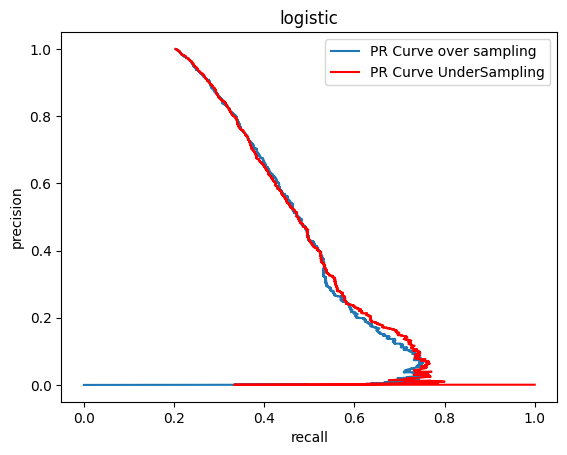

In [ ]:
from sklearn.metrics import precision_recall_curve

osampling_y_valid_scores = cross_val_predict(osampling_Simple_Model_pipeline, X_train, y_train, cv=3, method='decision_function')
osampling_precision_scores, osampling_recall_scores, osampling_thresholds = precision_recall_curve(y_train, osampling_y_valid_scores)


UnderSampling_y_valid_scores = cross_val_predict(UnderSampling_Simple_Model_pipeline, X_train, y_train, cv=3, method='decision_function')
UnderSampling_precision_scores, UnderSampling_recall_scores, UnderSampling_thresholds = precision_recall_curve(y_train, UnderSampling_y_valid_scores)




plt.plot(osampling_precision_scores[:-1], osampling_recall_scores[:-1], label='PR Curve over sampling')
plt.plot(UnderSampling_precision_scores[:-1], UnderSampling_recall_scores[:-1], c='red', label='PR Curve UnderSampling')
plt.title("logistic")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

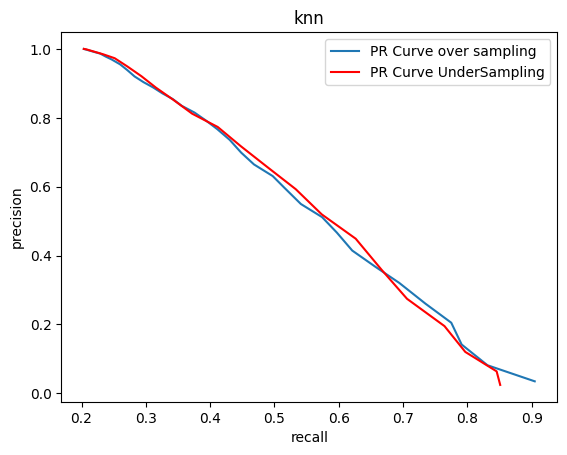

In [ ]:
osampling_y_valid_scores = cross_val_predict(osampling_KNN_pipeline, X_train, y_train, cv=3, method='predict_proba')
osampling_precision_scores, osampling_recall_scores, osampling_thresholds = precision_recall_curve(y_train, osampling_y_valid_scores[:, 1])


UnderSampling_y_valid_scores = cross_val_predict(UnderSampling_KNN_pipeline, X_train, y_train, cv=3, method='predict_proba')
UnderSampling_precision_scores, UnderSampling_recall_scores, UnderSampling_thresholds = precision_recall_curve(y_train, UnderSampling_y_valid_scores[:, 1])




plt.plot(osampling_precision_scores[:-1], osampling_recall_scores[:-1], label='PR Curve over sampling')
plt.plot(UnderSampling_precision_scores[:-1], UnderSampling_recall_scores[:-1], c='red', label='PR Curve UnderSampling')
plt.title("knn")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

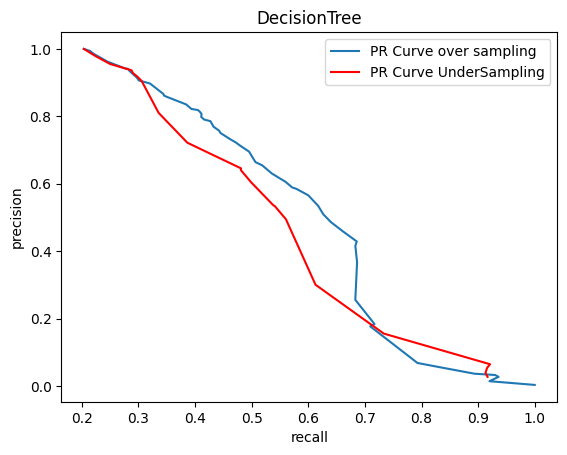

In [ ]:
osampling_y_valid_scores = cross_val_predict(osampling_DecisionTree_pipeline, X_train, y_train, cv=3, method='predict_proba')
osampling_precision_scores, osampling_recall_scores, osampling_thresholds = precision_recall_curve(y_train, osampling_y_valid_scores[:, 1])

UnderSampling_y_valid_scores = cross_val_predict(UnderSampling_DecisionTree_pipeline, X_train, y_train, cv=3, method='predict_proba')
UnderSampling_precision_scores, UnderSampling_recall_scores, UnderSampling_thresholds = precision_recall_curve(y_train, UnderSampling_y_valid_scores[:, 1])


plt.plot(osampling_precision_scores[:-1], osampling_recall_scores[:-1], label='PR Curve over sampling')
plt.plot(UnderSampling_precision_scores[:-1], UnderSampling_recall_scores[:-1], c='red', label='PR Curve UnderSampling')
plt.title("DecisionTree")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

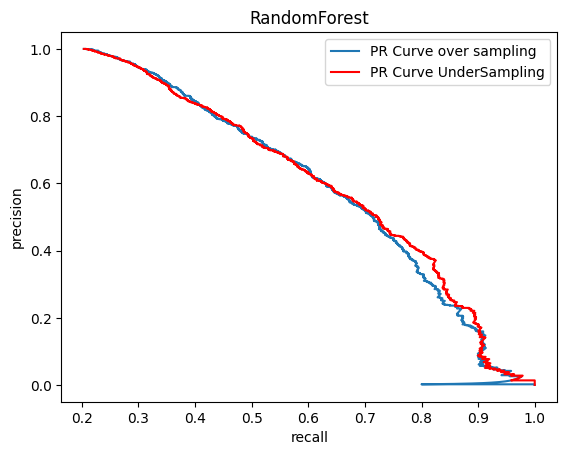

In [ ]:
osampling_y_valid_scores = cross_val_predict(osampling_RandomForest_pipeline, X_train, y_train, cv=3, method='predict_proba')
osampling_precision_scores, osampling_recall_scores, osampling_thresholds = precision_recall_curve(y_train, osampling_y_valid_scores[:, 1])

UnderSampling_y_valid_scores = cross_val_predict(UnderSampling_RandomForest_pipeline, X_train, y_train, cv=3, method='predict_proba')
UnderSampling_precision_scores, UnderSampling_recall_scores, UnderSampling_thresholds = precision_recall_curve(y_train, UnderSampling_y_valid_scores[:, 1])

plt.plot(osampling_precision_scores[:-1], osampling_recall_scores[:-1], label='PR Curve over sampling')
plt.plot(UnderSampling_precision_scores[:-1], UnderSampling_recall_scores[:-1], c='red', label='PR Curve UnderSampling')
plt.title("RandomForest")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

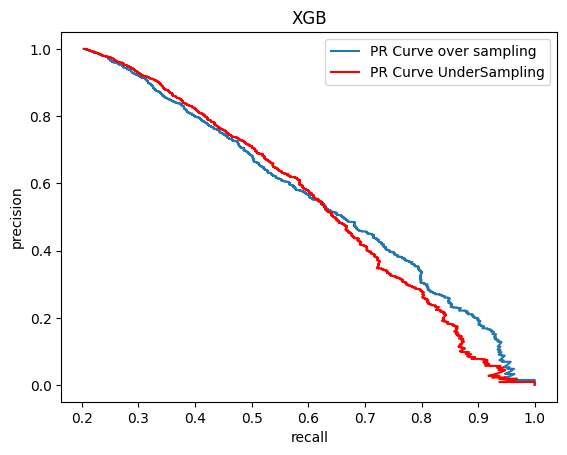

In [ ]:
osampling_y_valid_scores = cross_val_predict(osampling_XGB_pipeline, X_train, y_train, cv=3, method='predict_proba')
osampling_precision_scores, osampling_recall_scores, osampling_thresholds = precision_recall_curve(y_train, osampling_y_valid_scores[:, 1])

UnderSampling_y_valid_scores = cross_val_predict(UnderSampling_XGB_pipeline, X_train, y_train, cv=3, method='predict_proba')
UnderSampling_precision_scores, UnderSampling_recall_scores, UnderSampling_thresholds = precision_recall_curve(y_train, UnderSampling_y_valid_scores[:, 1])

plt.plot(osampling_precision_scores[:-1], osampling_recall_scores[:-1], label='PR Curve over sampling')
plt.plot(UnderSampling_precision_scores[:-1], UnderSampling_recall_scores[:-1], c='red', label='PR Curve UnderSampling')
plt.title("XGB")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

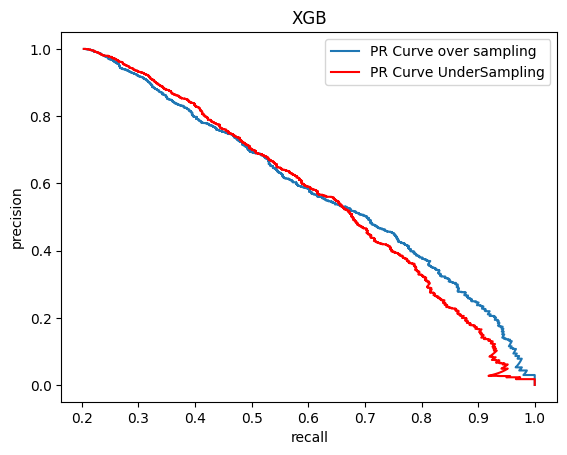

In [ ]:
osampling_y_valid_scores = cross_val_predict(osampling_CatBoost_pipeline, X_train, y_train, cv=3, method='predict_proba')
osampling_precision_scores, osampling_recall_scores, osampling_thresholds = precision_recall_curve(y_train, osampling_y_valid_scores[:, 1])

UnderSampling_y_valid_scores = cross_val_predict(UnderSamplin_CatBoost_pipeline, X_train, y_train, cv=3, method='predict_proba')
UnderSampling_precision_scores, UnderSampling_recall_scores, UnderSampling_thresholds = precision_recall_curve(y_train, UnderSampling_y_valid_scores[:, 1])

plt.plot(osampling_precision_scores[:-1], osampling_recall_scores[:-1], label='PR Curve over sampling')
plt.plot(UnderSampling_precision_scores[:-1], UnderSampling_recall_scores[:-1], c='red', label='PR Curve UnderSampling')
plt.title("XGB")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

## the best methods is SMOTE so i will use it with the best three model 
-   CatBoost
-   XGBoost
-   RandomForest

# **Ensembling Learning Technique with the best models**
## 1- **voting** 
## 2- **staking** 

--------------------------------------------

In [90]:
# voting

from sklearn.ensemble import VotingClassifier

pipe_cat = Pipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', CatBoostClassifier(    learning_rate=0.05,
            depth=4,
            l2_leaf_reg=10,
            n_estimators=1000,
            random_state=42,
            verbose=0))
])


pipe_xgb = Pipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(n_estimators=500,
            max_depth=4,
            learning_rate=0.05,
            subsample=0.7,
            colsample_bytree=0.7,
            gamma=5,
            reg_alpha=2,
            reg_lambda=3,
            eval_metric='logloss',
            random_state=42))
])


pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model',RandomForestClassifier(    n_estimators=500,
            max_depth=40,
            min_samples_split=10,
            min_samples_leaf=5,
            max_leaf_nodes=50,
            random_state=42,
            n_jobs=-1))
])

voting_model = VotingClassifier(estimators=[
    ('cat', pipe_cat),
    ('xgb', pipe_xgb),
    ('rf', pipe_rf)
], voting='soft')

voting_model

VotingClassifier(estimators=[('cat',
                              Pipeline(steps=[('pre',
                                               ColumnTransformer(transformers=[('Geography_gender_pipe',
                                                                                Pipeline(steps=[('handle_nans',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encode',
                                                                                                 OneHotEncoder(drop='first',
                                                                                                               sparse_output=False))]),
                                                                                ['Geography',
                                                                                 'Gender']),
                                                                               ('products_activity_pipe',
                                                                                Pipeline(steps=[('handle_nans',
                                                                                                 SimpleImputer(strate...
                                                                                                 RobustScaler())]),
                                                                                ['Age']),
                                                                               ('balance_pipe',
                                                                                Pipeline(steps=[('handle_nans',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scale',
                                                                                                 RobustScaler())]),
                                                                                ['Balance'])])),
                                              ('smote', SMOTE(random_state=42)),
                                              ('model',
                                               RandomForestClassifier(max_depth=40,
                                                                      max_leaf_nodes=50,
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=10,
                                                                      n_estimators=500,
                                                                      n_jobs=-1,
                                                                      random_state=42))]))],
                 voting='soft')

In [91]:
voting_model.fit(X_train , y_train)
print(f"Train Accuracy: {voting_model.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model


    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    voting_model.fit(X_train , y_train)
    
    y_valid_pred = voting_model.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8657164291072769
Average Valid Accuracy: 0.7566984995635545
Average Valid F1 Score: 0.5519918365188402
Average Valid Precsion: 0.4637751579367518
Average Valid Recall: 0.7103805686781991


# staking

In [92]:
catboost = CatBoostClassifier( learning_rate=0.05,depth=4,l2_leaf_reg=10,n_estimators=1000,random_state=42,verbose=0)
xgb =  XGBClassifier(n_estimators=500,max_depth=4,learning_rate=0.05,subsample=0.7,colsample_bytree=0.7,gamma=5,reg_alpha=2,reg_lambda=3,eval_metric='logloss',random_state=42)
rondmforest = RandomForestClassifier(n_estimators=500,max_depth=40,min_samples_split=10,min_samples_leaf=5,max_leaf_nodes=50,random_state=42,n_jobs=-1)



In [93]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(
    estimators=[
        ('cat', catboost),
        ('xgb', xgb),
        ('rf', rondmforest)
    ],
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=5
)

stacking_clf = Pipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('stacking', stacking_model)
])

stacking_clf

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('Geography_gender_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender']),
                                                 ('products_activity_pipe',
                                                  Pipeline(steps=[('handle_nans',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   Ordin...
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=500,
                                                               n_jobs=None,
                                                               num_parallel_tree=None, ...)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=40,
                                                                        max_leaf_nodes=50,
                                                                        min_samples_leaf=5,
                                                                        min_samples_split=10,
                                                                        n_estimators=500,
                                                                        n_jobs=-1,
                                                                        random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    passthrough=True))])

In [95]:
stacking_clf.fit(X_train , y_train)
print(f"Train Accuracy: {stacking_clf.score(X_train , y_train)}")


skfolds = StratifiedKFold(n_splits=3)
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 3 Model


    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = y_train.iloc[valid_indx]

    stacking_clf.fit(X_train , y_train)
    
    y_valid_pred = stacking_clf.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score( y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score( y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score( y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score( y_valid_fold, y_valid_pred))
    

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8860965241310328
Average Valid Accuracy: 0.7809606291699567
Average Valid F1 Score: 0.5830393328182732
Average Valid Precsion: 0.5126882873359365
Average Valid Recall: 0.7104360400803666


# **Ensembling Learning Technique**
## 1- **voting**  t=86 - v=81 - f1=59
## 2- **staking**  t=88 - v=81 - f1=60

In [96]:
from sklearn.metrics import precision_recall_curve
stacking_clf_y_valid_scores = cross_val_predict(stacking_clf, X_train, y_train, cv=3, method='predict_proba')
voting_model_y_valid_scores = cross_val_predict(voting_model, X_train, y_train, cv=3, method='predict_proba')


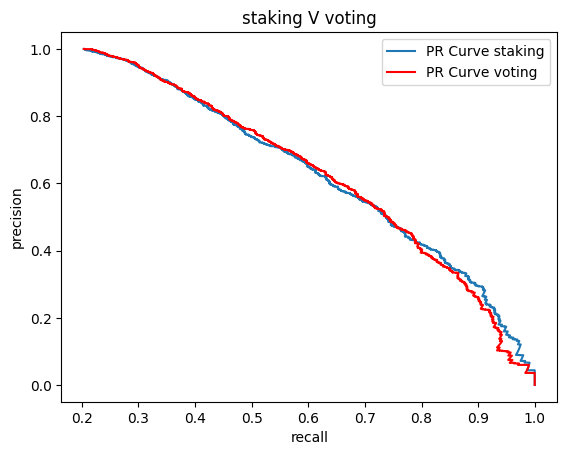

In [97]:
stacking_clf_precision_scores, stacking_clf_recall_scores, stacking_clf_thresholds = precision_recall_curve(y_train, stacking_clf_y_valid_scores[:, 1])
voting_model_precision_scores, voting_model_recall_scores, voting_model_thresholds = precision_recall_curve(y_train, voting_model_y_valid_scores[:, 1])

plt.plot(stacking_clf_precision_scores[:-1], stacking_clf_recall_scores[:-1], label='PR Curve staking')
plt.plot(voting_model_precision_scores[:-1], voting_model_recall_scores[:-1], c='red', label='PR Curve voting')
plt.title("staking V voting")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

# i moust Increase the Recall

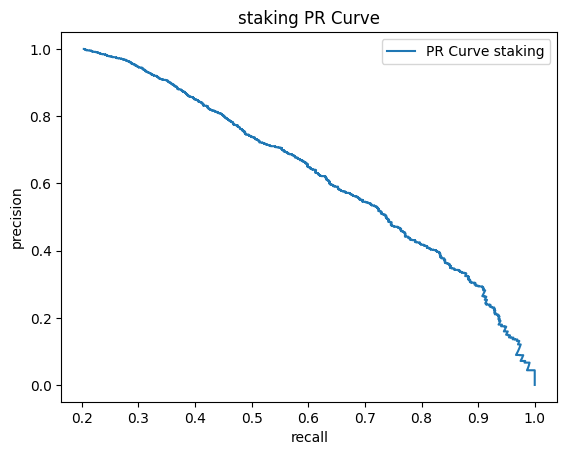

In [98]:
plt.plot(stacking_clf_precision_scores[:-1], stacking_clf_recall_scores[:-1], label='PR Curve staking')
plt.title("staking PR Curve")
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [101]:
indx = np.argmax(stacking_clf_recall_scores <= 0.75)

t_75_recall = stacking_clf_thresholds[indx]
t_75_recall

0.2209864932282999

In [102]:
y_stacking_prob = cross_val_predict(stacking_clf, X_train, y_train, cv=3, method='predict_proba')

y_stacking_threshold_pred = (y_stacking_prob[:, 1] >= t_75_recall)
print(f"Accuracy: {accuracy_score(y_train, y_stacking_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_stacking_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_stacking_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_stacking_threshold_pred)}") # Recall

Accuracy: 0.7889472368092023
F1 Score: 0.5912832929782083
Precsion: 0.4880095923261391
Recall: 0.75


# test score

In [103]:
y_stacking_test_scores = stacking_clf.predict_proba(X_test)
y_stacking_test_threshold_pred = (y_stacking_test_scores[:, 1] >= t_75_recall)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_threshold_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_threshold_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_threshold_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_threshold_pred)}") # Test Recall

Test Accuracy: 0.777
Test F1 Score: 0.5760456273764258
Test Precsion: 0.4697674418604651
Test Recall: 0.7444717444717445


# Save Model

In [104]:
joblib.dump(stacking_clf, 'stacking_pipeline.pkl')

['stacking_pipeline.pkl']